## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

Read the csv file and check the first 5 Rows

In [3]:
df=pd.read_csv("C://Users//Vijayalakshmi//Desktop//DataScience_Programs_August//Analysis//SF_Salaries//Salaries.csv")
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [4]:
df.tail(10)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148644,148645,Randy D Winn,"Stationary Eng, Sewage Plant",0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148645,148646,Carolyn A Wilson,Human Services Technician,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148646,148647,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148647,148648,Joann Anderson,Communications Dispatcher 2,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148648,148649,Leon Walker,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.00,0.00,-618.13,0.00,-618.13,-618.13,2014,NaN,San Francisco,PT


Using info(), check the Column Names and its Dataypes, Number of Columns & Rows.

In [5]:
df.shape

(148654, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


## Data Cleaning

Id column is not required for analysis as rownumber is available while querying and Combination of column values can be used for uniqueness.

Notes, Status, Agency columns are also not required for further analysis.

In [5]:
df['Status'].value_counts()

FT    22334
PT    15785
Name: Status, dtype: int64

In [6]:
df['Notes'].isnull().sum()

148654

In [7]:
df['Agency'].value_counts()

San Francisco    148654
Name: Agency, dtype: int64

So we can drop these 4 columns

In [8]:
df.drop(['Id', 'Notes', 'Status', 'Agency'], axis = 1, inplace = True)

In [9]:
df.head(1)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011


Check whether duplicated rows are present and drop them####elaborate the reason

In [10]:
df[df.duplicated()]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
148650,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014
148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014
148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014


In [12]:
df.shape

(148654, 9)

In [13]:
df=df.drop_duplicates()

In [14]:
df.shape

(148651, 9)

BasePay, OvertimePay, OtherPay, Benefits columns should be in Numeric Datatype. So, those columns have to be casted to perform calculations.

In [22]:
df['BasePay'] = pd.to_numeric(df['BasePay'],errors='coerce')
df['OvertimePay'] = pd.to_numeric(df['OvertimePay'],errors='coerce')
df['OtherPay'] = pd.to_numeric(df['OtherPay'],errors='coerce')
df['Benefits'] = pd.to_numeric(df['Benefits'],errors='coerce')

BasePay, OvertimePay, OtherPay, Benefits columns are having negative values which are invalid.

In [23]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
EmployeeName,148651,110811,Kevin Lee,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JobTitle,148651,2159,Transit Operator,7036,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BasePay,148045.0,NaN,NaN,NaN,66325.448841,42764.635495,-166.01,33588.2,65007.45,94691.05,319275.01
OvertimePay,148650.0,NaN,NaN,NaN,5066.059886,11454.380559,-0.01,0.0,0.0,4658.175,245131.88
OtherPay,148650.0,NaN,NaN,NaN,3648.767297,8056.601866,-7058.59,0.0,811.27,4236.065,400184.25
Benefits,112491.0,NaN,NaN,NaN,25007.893151,15402.215858,-33.89,11535.395,28628.62,35566.855,96570.66
TotalPay,148651.0,NaN,NaN,NaN,74769.830909,50516.398338,-618.13,36169.34,71427.22,105841.94,567595.43
TotalPayBenefits,148651.0,NaN,NaN,NaN,93694.445667,62792.756431,-618.13,44071.405,92406.01,132877.495,567595.43
Year,148651.0,NaN,NaN,NaN,2012.522613,1.117529,2011.0,2012.0,2013.0,2014.0,2014.0


In [24]:
df[df['BasePay']<0].shape

(11, 9)

In [25]:
df[df['OvertimePay']<0].shape

(1, 9)

In [26]:
df[df['OtherPay']<0].shape

(5, 9)

In [27]:
df[df['Benefits']<0].shape       

(4, 9)

In [28]:
df[df['TotalPayBenefits']<0].shape

(4, 9)

In [29]:
df[df['TotalPay']<0].shape

(1, 9)

Missing Values

In [30]:
df.isnull().sum()

EmployeeName            0
JobTitle                0
BasePay               606
OvertimePay             1
OtherPay                1
Benefits            36160
TotalPay                0
TotalPayBenefits        0
Year                    0
dtype: int64

In [31]:
)mean_base_pay = df.groupby('JobTitle')['BasePay'].mean().reset_index()
round(mean_base_pay,2

,JobTitle,BasePay
0,ACCOUNT CLERK,43300.81
1,ACCOUNTANT,46643.17
2,ACCOUNTANT INTERN,28732.66
3,"ACPO,JuvP, Juv Prob (SFERS)",62290.78
4,ACUPUNCTURIST,66374.40
...,...,...
2154,X-RAY LABORATORY AIDE,47664.77
2155,X-Ray Laboratory Aide,46086.39
2156,"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS",52609.91
2157,Youth Comm Advisor,39077.96


In [32]:
MeanBase_By_JobTitle = df.groupby('JobTitle')['BasePay'].transform('mean')
df['BasePay'].fillna(MeanBase_By_JobTitle, inplace=True)

In [64]:
df.isnull().sum()

EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
dtype: int64

Here , the row 148646 is invalid , we can drop it.

In [35]:
df = df.drop(df.index[148646])

Fill NaN/Missing values with the Mean of BasePay as they are having only one job title, not able to find the mean for group

In [39]:
df['BasePay'].fillna(value=df['BasePay'].mean(), inplace=True)


Fill Benefits series Nan values with the MeanBenefits value

In [55]:
df['Benefits'].fillna(value=df['Benefits'].mean(), inplace=True)

Calculate TotalPay and Total Benefits and assign the values permanently to the dataframe.

In [59]:
df['BasePay']=round(df['BasePay'],2)
df['Benefits']=round(df['Benefits'],2)

In [63]:
df['TotalPay'] = df['BasePay'] + df['OvertimePay']+df['OtherPay']+df['Benefits']
df['TotalPayBenefits'] = df['BasePay'] + df['OvertimePay']+df['OtherPay']+df['Benefits']

In [70]:
df.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,25007.89,592603.32,592603.32,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,25007.89,563917.17,563917.17,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,25007.89,360287.80,360287.80,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,25007.89,357351.50,357351.50,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,25007.89,351381.08,351381.08,2011


## Data Visualization

What are the Ten job titles having the highest average base pay, benefits, overtime pay, and other pay?

In [66]:
round(df.groupby(['JobTitle'])['BasePay'].mean(),2).nlargest(10)

JobTitle
Chief of Police                           309767.68
Chief, Fire Department                    304232.34
Gen Mgr, Public Trnsp Dept                297769.41
CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)    285262.00
Dep Dir for Investments, Ret              276153.76
Mayor                                     275852.53
Adm, SFGH Medical Center                  265218.78
EXECUTIVE CONTRACT EMPLOYEE               264452.52
Controller                                263588.75
Dept Head V                               259590.71
Name: BasePay, dtype: float64

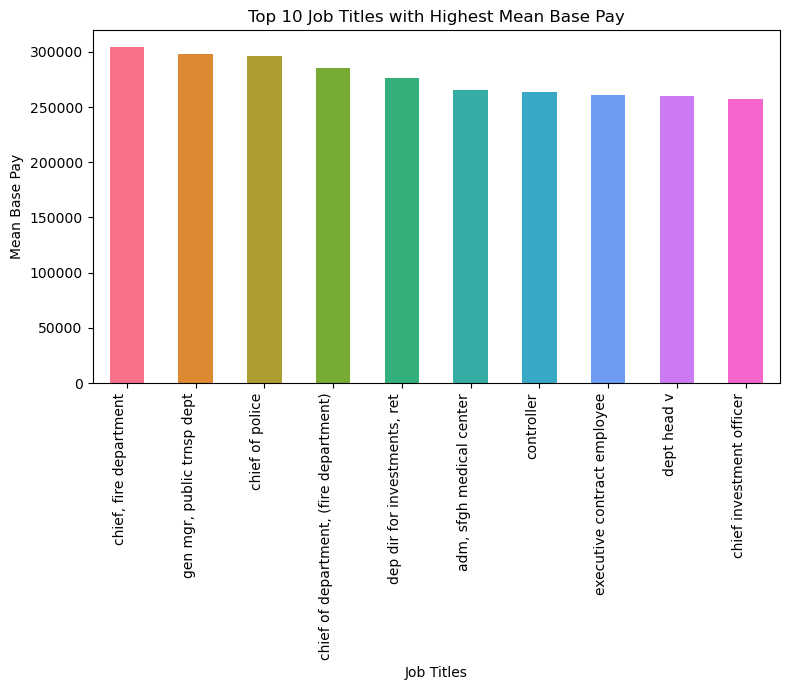

In [96]:
top_job_titles = round(df.groupby(['JobTitle'])['BasePay'].mean(), 2).nlargest(10)
plt.figure(figsize=(8, 7))
colors = sns.color_palette('husl', len(top_job_titles))
top_job_titles.plot(kind='bar', color=colors)
plt.title('Top 10 Job Titles with Highest Mean Base Pay')
plt.xlabel('Job Titles')
plt.ylabel('Mean Base Pay')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [67]:
round(df.groupby(['JobTitle'])['OvertimePay'].mean(),2).nlargest(10)

JobTitle
Wire Rope Cable Maint Sprv                82446.92
WIRE ROPE CABLE MAINTENANCE SUPERVISOR    66164.73
Trnst Power Line Wrk Sprv 2               59259.31
Track Maint Wrk Sprv 1                    50613.90
Incident Support Specialist               50596.39
Battalion Chief, Fire Suppress            49453.05
Mech Shop & Equip Supt                    47362.47
Transit Power Line Sprv1                  46455.93
Asst Chf of Dept (Fire Dept)              46024.22
Heating/Ventilating Inspector             45997.24
Name: OvertimePay, dtype: float64

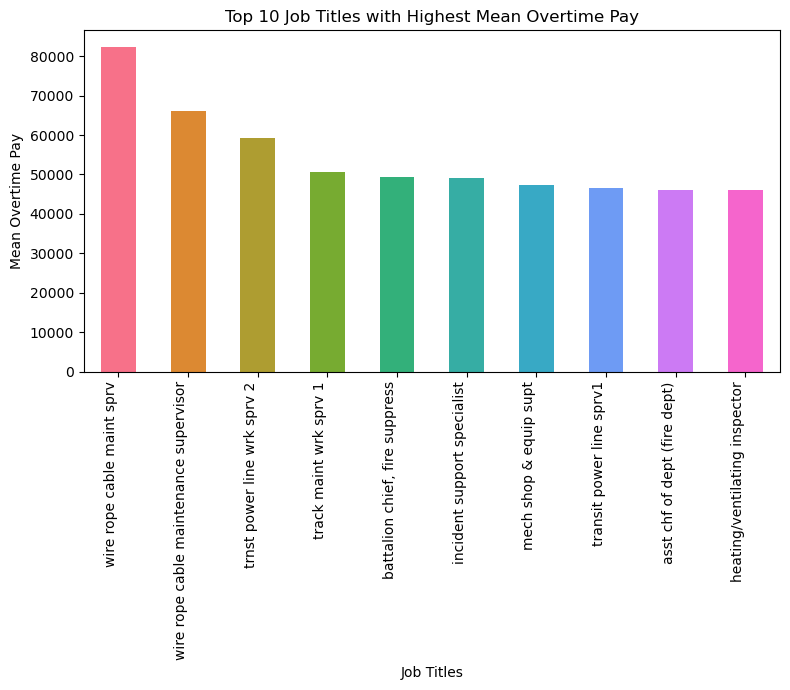

In [95]:
top_job_titles = round(df.groupby(['JobTitle'])['OvertimePay'].mean(), 2).nlargest(10)
plt.figure(figsize=(8, 7))
colors = sns.color_palette('husl', len(top_job_titles))
top_job_titles.plot(kind='bar', color=colors)
plt.title('Top 10 Job Titles with Highest Mean Overtime Pay')
plt.xlabel('Job Titles')
plt.ylabel('Mean Overtime Pay')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [68]:
round(df.groupby(['JobTitle'])['OtherPay'].mean(),2).nlargest(10)

JobTitle
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY        200092.12
LIEUTENANT II (POLICE DEPARTMENT)                      98480.01
Chief Investment Officer                               82313.70
Assistant Deputy Chief 2                               82049.00
ASSISTANT DEPUTY CHIEF II                              75352.33
DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)           74901.91
Deputy Chief 3                                         56694.05
TRAFFIC HEARING OFFICER                                53439.37
LIEUTENANT, BUREAU OF FIRE PREVENTION AND PUBLIC S     51365.95
DEPUTY DIRECTOR OF INVESTMENTS                         51322.50
Name: OtherPay, dtype: float64

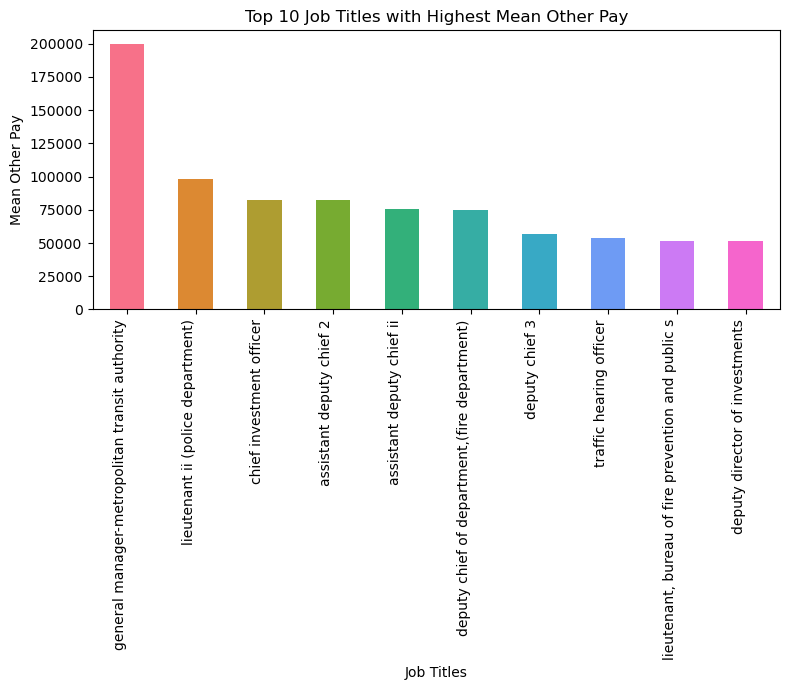

In [94]:
top_job_titles = round(df.groupby(['JobTitle'])['OtherPay'].mean(), 2).nlargest(10)

# Create a bar plot
plt.figure(figsize=(8, 7))
colors = sns.color_palette('husl', len(top_job_titles))
top_job_titles.plot(kind='bar', color=colors)
plt.title('Top 10 Job Titles with Highest Mean Other Pay')
plt.xlabel('Job Titles')
plt.ylabel('Mean Other Pay')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


In [69]:
round(df.groupby(['JobTitle'])['Benefits'].mean(),2).nlargest(10)

JobTitle
Chief Investment Officer        96570.66
Gen Mgr, Public Trnsp Dept      82927.03
Chief, Fire Department          82893.64
Chief of Police                 82548.62
Mayor                           78360.38
Controller                      78310.39
Dep Dir for Investments, Ret    77138.72
Adm, SFGH Medical Center        77032.26
Dept Head V                     75898.81
Administrator, DPH              74813.58
Name: Benefits, dtype: float64

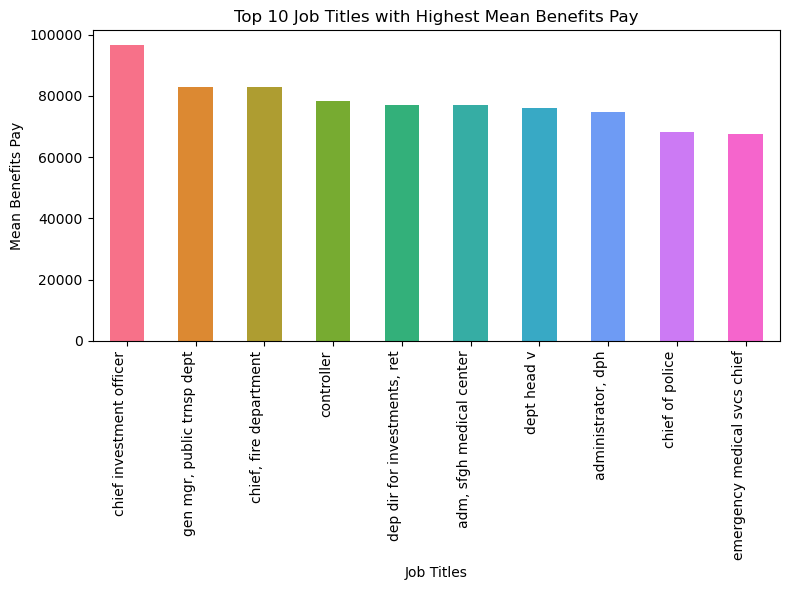

In [93]:
top_job_titles = round(df.groupby(['JobTitle'])['Benefits'].mean(), 2).nlargest(10)
plt.figure(figsize=(8, 6))
colors = sns.color_palette('husl', len(top_job_titles))
top_job_titles.plot(kind='bar', color=colors)
plt.title('Top 10 Job Titles with Highest Mean Benefits Pay')
plt.xlabel('Job Titles')
plt.ylabel('Mean Benefits Pay')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

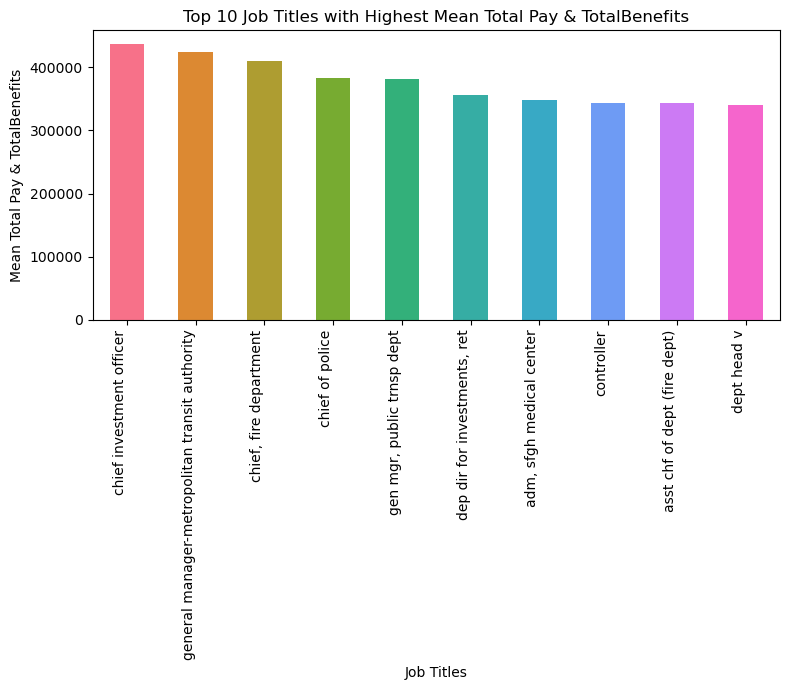

In [92]:
top_job_titles = round(df.groupby(['JobTitle'])['TotalPay'].mean(), 2).nlargest(10)
plt.figure(figsize=(8, 7))
colors = sns.color_palette('husl', len(top_job_titles))
top_job_titles.plot(kind='bar', color=colors)
plt.title('Top 10 Job Titles with Highest Mean Total Pay & TotalBenefits')
plt.xlabel('Job Titles')
plt.ylabel('Mean Total Pay & TotalBenefits')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

Highest Number of Unique Job Titles (Top 10) and its Average Salary

In [97]:
jobcounts=df['JobTitle'].value_counts()[0:10]

transit operator                9424
special nurse                   5791
registered nurse                4955
custodian                       3214
firefighter                     3153
recreation leader               2663
deputy sheriff                  2618
public svc aide-public works    2518
police officer 3                2421
patient care assistant          1945
Name: JobTitle, dtype: int64

<AxesSubplot:>

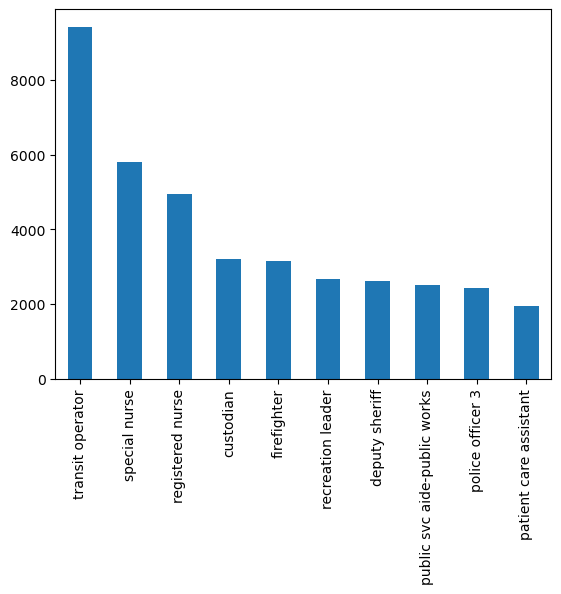

In [89]:
df['JobTitle'].value_counts()[0:10].plot.bar()

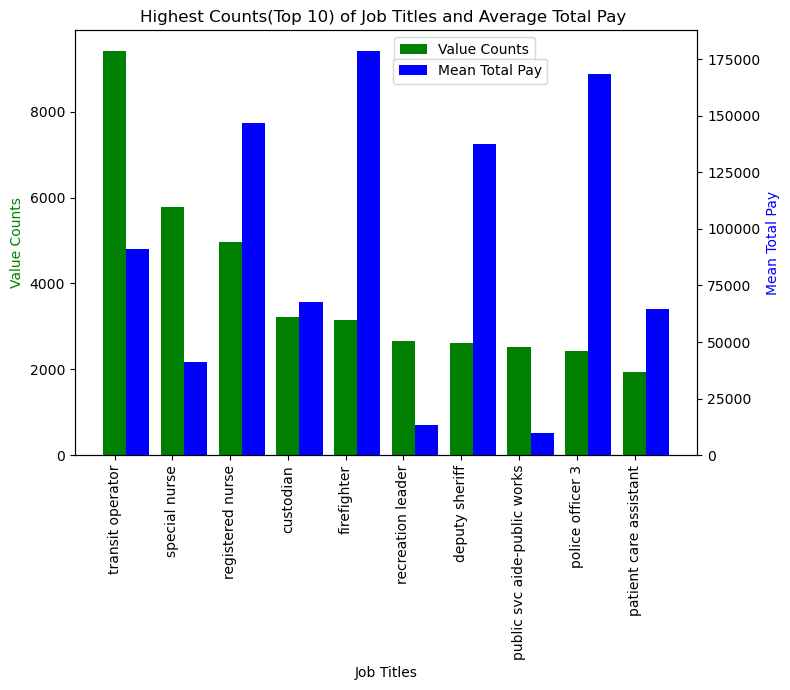

In [166]:
job_title_value_counts = df['JobTitle'].value_counts().nlargest(10)
top_10_job_titles = job_title_value_counts.index.tolist()
mean_totalpay_by_job = df[df['JobTitle'].isin(top_10_job_titles)].groupby('JobTitle')['TotalPay'].mean()
mean_totalpay_aligned = mean_totalpay_by_job.loc[top_10_job_titles]
# Create a figure and axis for the double bar plot
fig, ax = plt.subplots(figsize=(8, 7))

# Plot value counts of job titles (top 10) in the first bar group
ax.bar(range(len(job_title_value_counts)), job_title_value_counts.values, width=0.4, color='green', label='Value Counts')

# Create a twin axis for the right side labels
ax2 = ax.twinx()

# Plot mean total pay by job title in the second bar group
ax2.bar([x + 0.4 for x in range(len(mean_totalpay_aligned))], mean_totalpay_aligned.values, width=0.4, color='blue', label='Mean Total Pay')

# Set labels, title, and legend
ax.set_xlabel('Job Titles')
ax.set_ylabel('Value Counts', color='green')
ax2.set_ylabel('Mean Total Pay', color='blue')
ax.set_title('Highest Counts(Top 10) of Job Titles and Average Total Pay ')
ax.set_xticks(range(len(job_title_value_counts)))
ax.set_xticklabels(job_title_value_counts.index, rotation=90)

ax.legend(loc='upper right', bbox_to_anchor=(0.75, 1))
ax2.legend(loc='upper right', bbox_to_anchor=(0.77, 0.95))


plt.tight_layout()
plt.show()


Check number of records group by Year



<AxesSubplot:xlabel='Year', ylabel='count'>

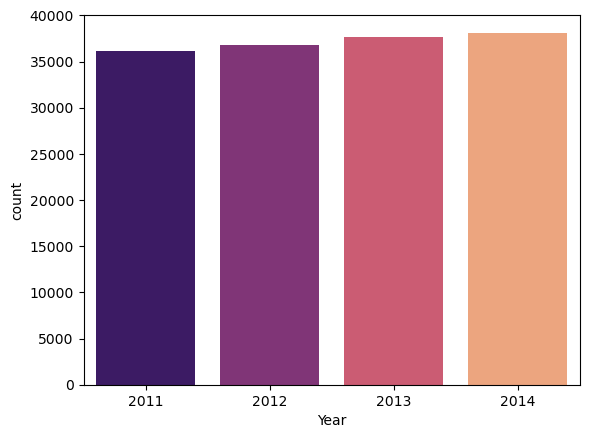

In [112]:
sns.countplot(df['Year'], palette='magma')

Yearwise Jobs Count(Top 10 jobs taken)

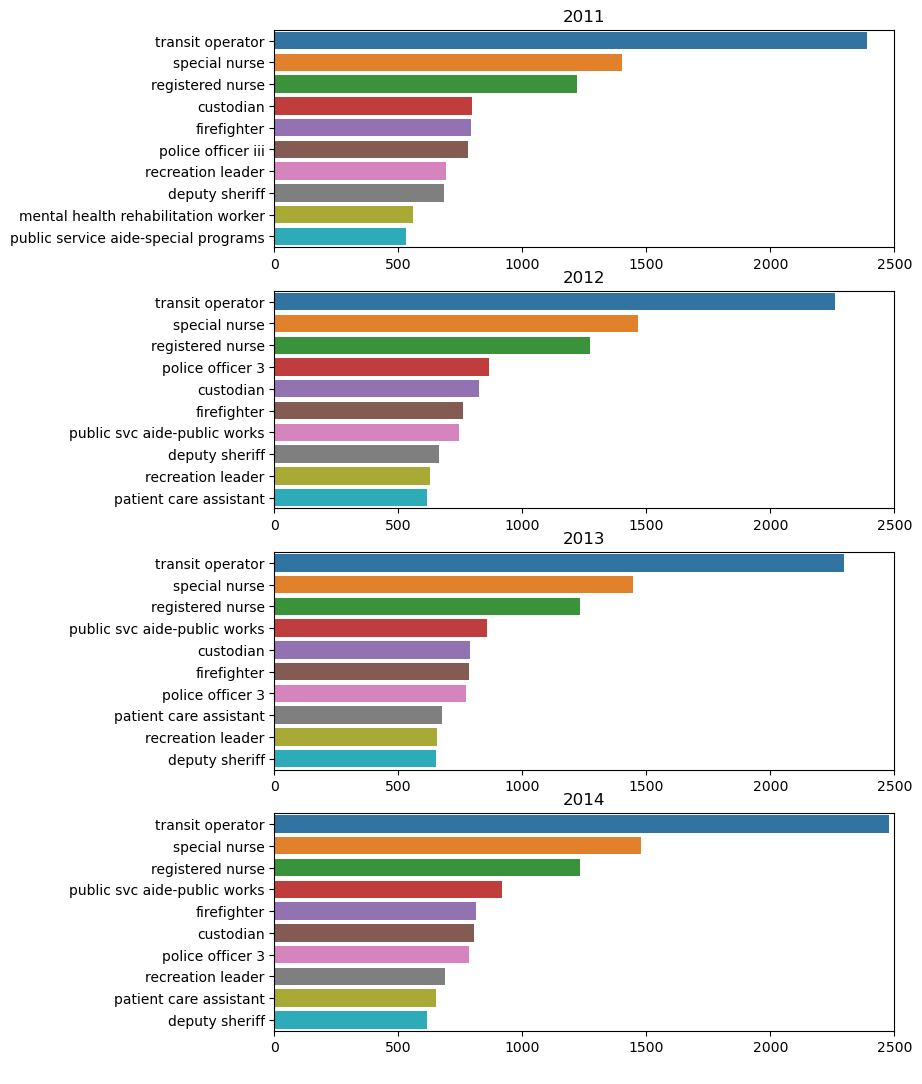

In [113]:
fig, ax = plt.subplots(4, figsize = (8, 13))
for i in range(4):
    jcount = df[df['Year'] == (2011 + i)]['JobTitle'].value_counts()[:10]
    sns.barplot(x=jcount, y = jcount.keys(),ax = ax[i])
    ax[i].set_title(str(2011+i))
    ax[i].set_xlabel(' ')
    ax[i].set_xlim(0,2500)

Distribution of a 'BasePay', 'Benefits' and 'TotalPay', JobTitle by year using violin-plot



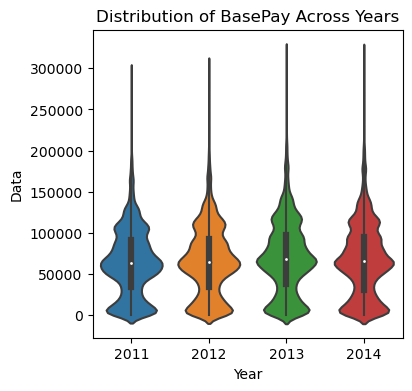

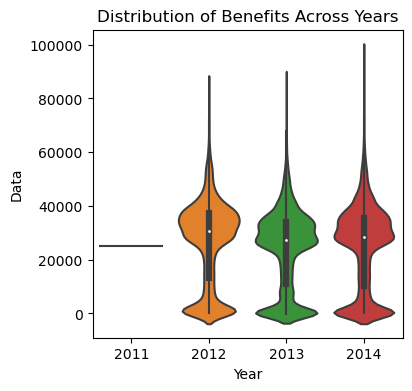

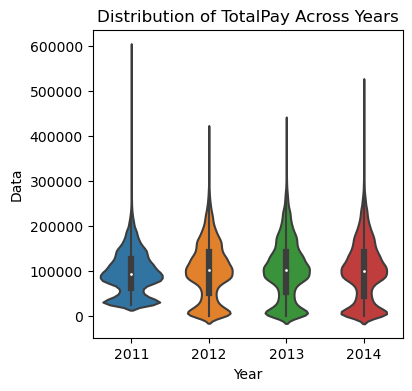

In [124]:
param = ['BasePay', 'Benefits', 'TotalPay']
for i in range(3):
    plt.figure(figsize=(4,4))
    sns.violinplot(data=df, x='Year', y=param[i])
    plt.title(f"Distribution of {param[i]} Across Years")
    plt.xlabel('Year')
    plt.ylabel('Data')
    plt.show()

In [172]:
# f,ax = plt.subplots(figsize=(5, 5))
# sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [171]:
# sns.distplot(df['TotalPay'])
# sns.pairplot(df)

## Analysis


Employees who earn the highest totalPay amount in each year.

In [98]:
df['JobTitle'] = df['JobTitle'].str.lower()
years = df['Year'].unique()
for year in years:
    sorteddata = df[df['Year']==year].sort_values(by='TotalPay',ascending=False)
    employeeName = sorteddata['EmployeeName'].iloc[0]
    Pay = sorteddata['TotalPay'].iloc[0]
    print("In the year %d %s earned the highest salary which is %8.1f"%(year,employeeName,Pay))

In the year 2011 NATHANIEL FORD earned the highest salary which is 592603.3
In the year 2012 Gary Altenberg earned the highest salary which is 407274.8
In the year 2013 Gregory P Suhr earned the highest salary which is 425815.3
In the year 2014 David Shinn earned the highest salary which is 510732.7


Highest Paid EmployeeName

In [100]:
df[df['TotalPayBenefits'] == df['TotalPayBenefits'].max()]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,general manager-metropolitan transit authority,167411.18,0.0,400184.25,25007.89,592603.32,592603.32,2011


Lowest Paid Employee

In [104]:
df[df['TotalPayBenefits'] == df['TotalPayBenefits'].min()]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
148653,Joe Lopez,"counselor, log cabin ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014


How Many Unique Job Titles?

In [167]:
df['JobTitle'].nunique()


1636

Is it a correlation between length of job title and salaries?


In [109]:
df['Title_len'] = df['JobTitle'].apply(len)
df[['JobTitle', 'Title_len']]

,JobTitle,Title_len
0,general manager-metropolitan transit authority,46
1,captain iii (police department),31
2,captain iii (police department),31
3,wire rope cable maintenance mechanic,36
4,"deputy chief of department,(fire department)",44
...,...,...
148645,human services technician,25
148647,communications dispatcher 2,27
148648,custodian,9
148649,custodian,9


In [110]:
df[['TotalPayBenefits' , 'Title_len']].corr()

,TotalPayBenefits,Title_len
TotalPayBenefits,1.000000,-0.016553
Title_len,-0.016553,1.000000


<AxesSubplot:>

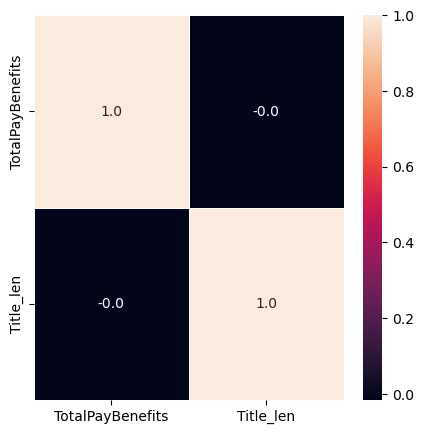

In [111]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(df[['TotalPayBenefits' , 'Title_len']].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

 In this case, the correlation coefficient (-0.016553) indicates a very minimal, almost negligible, negative linear relationship between 'TotalPayBenefits' and 'Title_len'.

** What is the job title of JOSEPH DRISCOLL

In [180]:
df[df['EmployeeName']=='JOSEPH DRISCOLL'][['JobTitle','TotalPay']]

,JobTitle,TotalPay
24,"captain, fire suppression",295332.8
